# Create data

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [49]:
def atmo_event_rate(energy, cos_theta, sin2theta=0.9, dm2=2.4e-3):
    flux = 1e5*energy**-1.7 # the true neutrino flux is steeper, this takes into account 
                            # neutrino cross-section, which is proportional to E
                            # as well as that we are working with logarithmic energy bins    
    l = 12e3 * cos_theta # base line - max corresponds to diameter of the Earth 12e3 km

    # two flavor oscillation propability for muon disappearance - see wikipedia 
    osc_prop = 1-sin2theta * (np.sin(1.27*dm2*l/energy))**2

    return flux*osc_prop

def run_experiment(energy, cosdec, sin2theta=0.9, dm2=2.4e-3):
    x = np.array(energy.size)
    events=np.zeros(energy.size*cosdec.size)

    i = 0
    for e in energy:
        for c in cosdec:
            mu = atmo_event_rate(e,c,sin2theta,dm2)
            sig = np.sqrt(mu)
            event_random = np.random.normal(mu,sig)
            events[i] = int(event_random) 
            
            i=i+1
                   
    return events

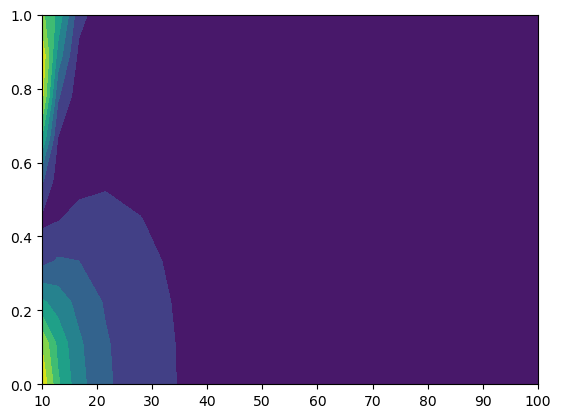

In [50]:
# lets generate one experiment, with 10 energy bins and 10 cos(declination) bins

cosdec =  np.linspace(0, 1, 10) # 10 steps in cos(declination) from 0 to 1 
log10_energy = np.linspace(1, 2, 10) # 10 steps in log10(energy) from 10 to 100 GeV
energy=10**log10_energy

# run the experiment 
events=run_experiment(energy,cosdec,0.9,2.4e-3)

# lets print the events per bin

i = 0
for e in energy:
    for c in cosdec:
        #print("energy, cosdec, events:",e,c, events[i])
        i=i+1

E, C=np.meshgrid(energy,cosdec)
Z=atmo_event_rate(E, C, sin2theta=0.9, dm2=2.4e-3)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(E, C, Z)

# Chi square

In [51]:
def chi_square(A,B):
    x2=0
    cosine= np.linspace(0, 1, 10) # 10 steps in cos(declination) from 0 to 1 
    log10_energy = np.linspace(1, 2, 10) # 10 steps in log10(energy) from 10 to 100 GeV
    energy=10**log10_energy
    i=0
    for e in energy:
        for cos in cosine:
            L=12e3*cos
            flux=1e5*e**-1.7
            f=flux*(1-A*(np.sin(1.27*B*L/e))**2)
            sigma=np.sqrt(flux*(1-0.9*(np.sin(1.27*(2.4e-3)*L/e))**2))
            #sigma=np.sqrt(events[i])
            x2=x2+(events[i]-f)**2/sigma**2
            i=i+1
            
    return x2

<function matplotlib.pyplot.show(close=None, block=None)>

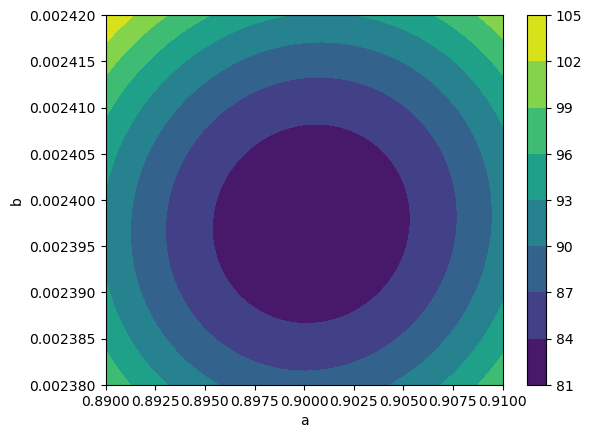

In [52]:
la=300
lb=300
ai=0.89
af=0.91
bi=2.38e-3
bf=2.42e-3
alist=np.linspace(ai,af,la)
blist=np.linspace(bi,bf,lb)
A, B=np.meshgrid(alist,blist)
Z=chi_square(A,B)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(A, B, Z)
fig.colorbar(cp) # Add a colorbar to a plot
plt.xlabel('a')
plt.ylabel('b')
plt.show

# find the min position

In [53]:
x2list=[]
for a in alist:
    x2list.append(chi_square(a,blist))
position=np.nanargmin(x2list)
print(position)
#x2_min=x2list[np.nanargmin(x2list)]
a_pos=ai+(af-ai)*(position//lb)/(la-1)
b_pos=bi+(bf-bi)*(position%lb)/(lb-1)
x2_min_list=x2list[position//lb]
x2_min=x2_min_list[position%lb]
print(x2_min)
#print(alist)
#print(position//lb)
#print(position%lb)
print(a_pos,b_pos)

x2_list=[]
i=0
while i < la:
    listtemp=x2list[i]
    j=0
    while j < lb:
        x2_list.append(listtemp[j])
        j=j+1
    i=i+1
print(len(x2_list))
    

46630
81.44230621471424
0.9003678929765887 0.002397391304347826
90000


# 1D-error(ignore this)

206296.65053229593
44055106688.792786
9.694776889685363e-06
4.539768826638165e-11


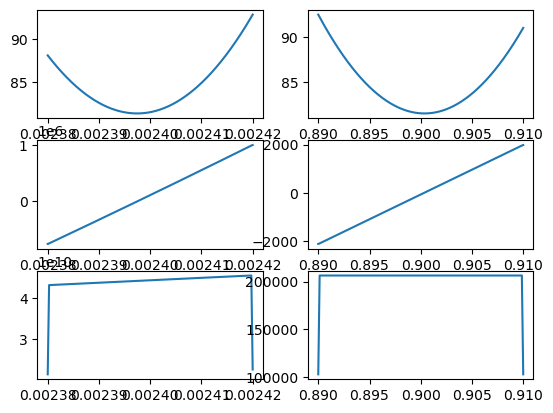

In [54]:
A09=[]
for b in blist:
    A09.append(chi_square(a_pos,b))


B24=[]
for a in alist:
    B24.append(chi_square(a,b_pos))

dx2db=np.gradient(A09,blist)
dx2da=np.gradient(B24,alist)

dx2dbb=np.gradient(dx2db,blist)
dx2daa=np.gradient(dx2da,alist)

fig, axs = plt.subplots(3,2)
axs[0,0].plot(blist, A09)
axs[1,0].plot(blist, dx2db)
axs[2,0].plot(blist, dx2dbb)
axs[0,1].plot(alist, B24)
axs[1,1].plot(alist, dx2da)
axs[2,1].plot(alist, dx2daa)
a_index=position//lb
b_index=position%lb
print(dx2daa[a_index])
print(dx2dbb[b_index])
a_error=1/(dx2daa[a_index]/2)
b_error=1/(dx2dbb[b_index]/2)
print(a_error)
print(b_error)

# 2D-error

Text(0, 0.5, 'b')

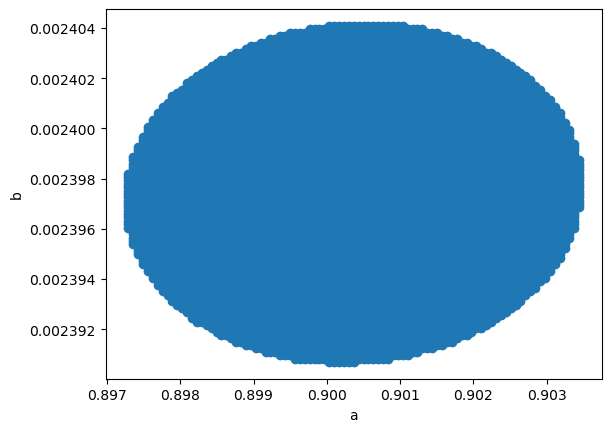

In [55]:
a_2d_error=[]
b_2d_error=[]
i=0
for a in alist:
     for b in blist:
            if x2_list[i] < x2_min+1:
                a_2d_error.append(ai+(af-ai)*(i//lb)/(la-1))
                b_2d_error.append(bi+(bf-bi)*(i%lb)/(lb-1))
            i=i+1
plt.plot(a_2d_error, b_2d_error, 'o')
plt.xlabel('a')
plt.ylabel('b')
#plt.xlim([0.87,0.94])
#plt.ylim([0.00233,0.00245])

# experiments

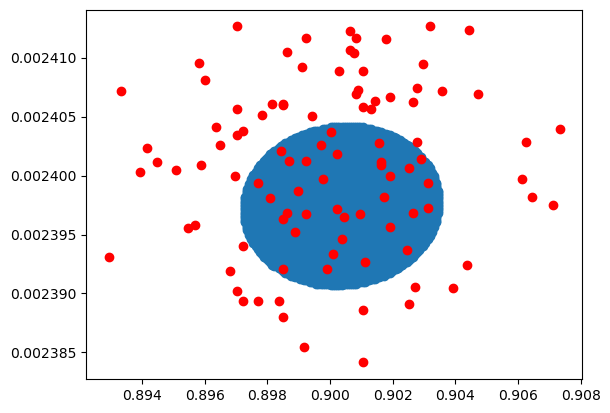

In [56]:
a_exp=[]
b_exp=[]
i=0
while i<100:
    events=run_experiment(energy,cosdec,0.9,2.4e-3)
    
    x2list=[]
    for a in alist:
        x2list.append(chi_square(a,blist))
    position=np.nanargmin(x2list)
    a_pos=ai+(af-ai)*(position//lb)/(la-1)
    b_pos=bi+(bf-bi)*(position%lb)/(lb-1)
    
    a_exp.append(a_pos)
    b_exp.append(b_pos)
    i=i+1
plt.plot(a_2d_error, b_2d_error, 'o--')
plt.plot(a_exp, b_exp,'ro')
#plt.xlim([0.87,0.94])
#plt.ylim([0.00233,0.00245])

2d confident is: 35
confident a is: 68
confident b is: 55


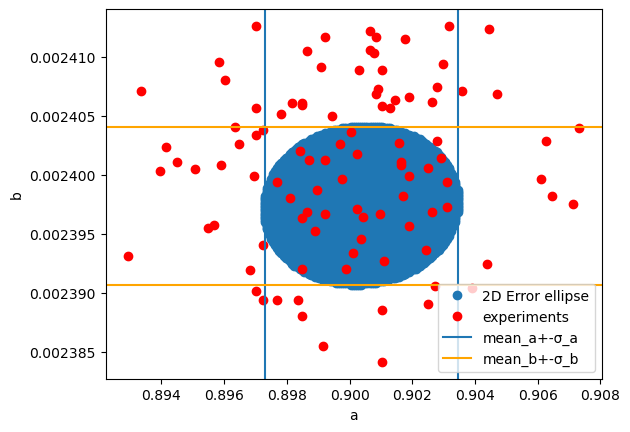

In [57]:
plt.plot(a_2d_error, b_2d_error, 'o', label='2D Error ellipse')
plt.plot(a_exp, b_exp,'ro',label='experiments')
plt.xlabel('a')
plt.ylabel('b')
i=0
j=0
while i < 100:
    if a_exp[i] in a_2d_error and b_exp[i] in b_2d_error:
        j=j+1
    i=i+1
print("2d confident is:",j)
plt.axvline(x=max(a_2d_error), label='mean_a+-\u03C3_a')
plt.axvline(x=min(a_2d_error))
plt.axhline(y=max(b_2d_error),color='orange',label='mean_b+-\u03C3_b')
plt.axhline(y=min(b_2d_error),color='orange')
plt.legend()
m=0
i=0
while i < 100:
    if a_exp[i] < max(a_2d_error) and a_exp[i] > min(a_2d_error):
        m=m+1
    i=i+1
print("confident a is:",m)
i=0
n=0
while i < 100:
    if b_exp[i] < max(b_2d_error) and b_exp[i] > min(b_2d_error):
        n=n+1
    i=i+1
print("confident b is:",n)